In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
X = np.array([1,4,3,5])
X = X.reshape((1,4))
print(X)
X = np.transpose(X) 
print(X.shape)
X = np.insert(X,0,1,axis=1) # Insert the first column of 1s
print(X.shape)

[[1 4 3 5]]
(4, 1)
(4, 2)


In [21]:
y = np.array([4,2,3,2])
y = y.reshape((1,4))
print(y)
y = np.transpose(y)
print(y.shape)
m = y.size # Number of training examples

[[4 2 3 2]]
(4, 1)


Text(0.5, 0, 'y')

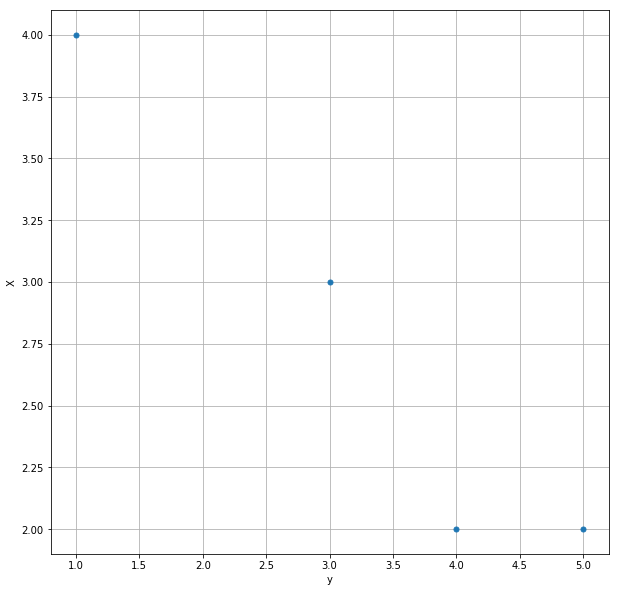

In [22]:
#Plot the data
plt.figure(figsize=(10,10))
plt.plot(X[:,1],y[:,0],'o',markersize=5)
plt.grid(True) 
plt.ylabel('X')
plt.xlabel('y')

In [23]:
iterations = 2000
alpha = 0.01

In [24]:
def hf(theta,X): #Linear hypothesis function hf = theta0 + theta1 * x = X.theta
    return np.dot(X,theta)
def computeCost(mytheta,X,y): #Cost function = 1/2m * (hf-y)exp2
    #where X - m,n; theta - n,1; y - m,1; n - features, m - training set
    return float((1./(2*m)) * np.dot((hf(mytheta,X)-y).T,(hf(mytheta,X)-y)))

#Test computeCost theta initials as 0s:
initialTheta = np.zeros((X.shape[1],1))
print(computeCost(initialTheta,X,y))

4.125


In [25]:
def descendGradient(X, theta):
    costHist = [] #Used to plot cost as function of iteration
    thetaHist = np.zeros((1,2)) #Initial for thetaHist

    for i in range(iterations):
        tmptheta = theta
        costHist.append(computeCost(theta,X,y))
        thetaHist = np.vstack((thetaHist, theta.T)) #Put theta.T into thetaHist
        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((hf(theta,X) - y)*X[:,j].reshape(m,1))
        theta = tmptheta
    thetaHist = np.delete(thetaHist, 0, axis=0) # Delete the initials
    return theta, thetaHist, costHist

For the  1 th iteration, theta =  [0. 0.] , cost =  4.125
For the  100 th iteration, theta =  [0.7993623  0.41473328] , cost =  1.2060313279908463
For the  200 th iteration, theta =  [1.35617373 0.27120511] , cost =  0.8775356294980937
For the  300 th iteration, theta =  [1.8295274  0.14918938] , cost =  0.640133276729445
For the  400 th iteration, theta =  [2.23193245 0.04546197] , cost =  0.468563668322442
For the  500 th iteration, theta =  [ 2.574023   -0.04271825] , cost =  0.3445710870121016
For the  600 th iteration, theta =  [ 2.86483931 -0.11768157] , cost =  0.25496220836076017
For the  700 th iteration, theta =  [ 3.11206661 -0.18140902] , cost =  0.19020227636891596
For the  800 th iteration, theta =  [ 3.32223825 -0.23558468] , cost =  0.14340056592785394
For the  900 th iteration, theta =  [ 3.5009083  -0.28164022] , cost =  0.10957718111508344
For the  1000 th iteration, theta =  [ 3.65279839 -0.32079272] , cost =  0.08513317363306189
For the  1100 th iteration, theta = 

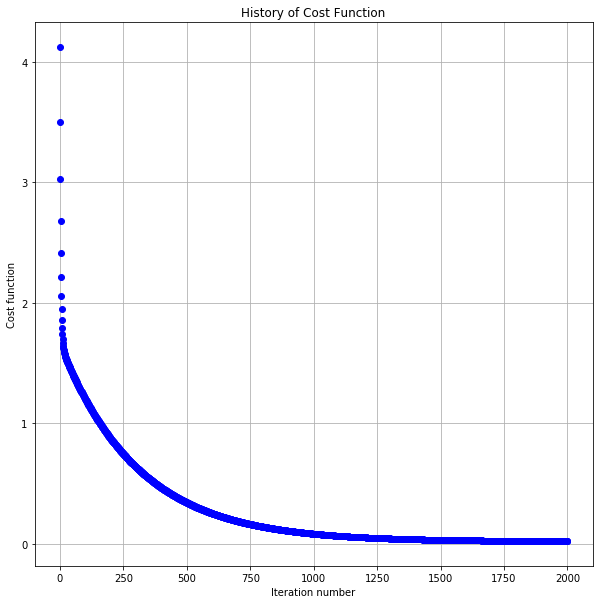

In [27]:
initial_theta = np.zeros((X.shape[1],1))
theta, thetaHist, costHist = descendGradient(X,initial_theta)

for i in range(iterations):
    if i == 0:
        print("For the ",i+1,"th iteration, theta = ",thetaHist[0,:],", cost = ",costHist[0])
    elif (i+1) % 100 == 0:
        print("For the ",i+1,"th iteration, theta = ",thetaHist[i,:],", cost = ",costHist[i])

#Plot the history of the cost function
def plotCostHist(costHist):
    plt.figure(figsize=(10,10))
    plt.plot(range(len(costHist)),costHist,'bo')
    plt.grid(True)
    plt.title("History of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
plotCostHist(costHist)


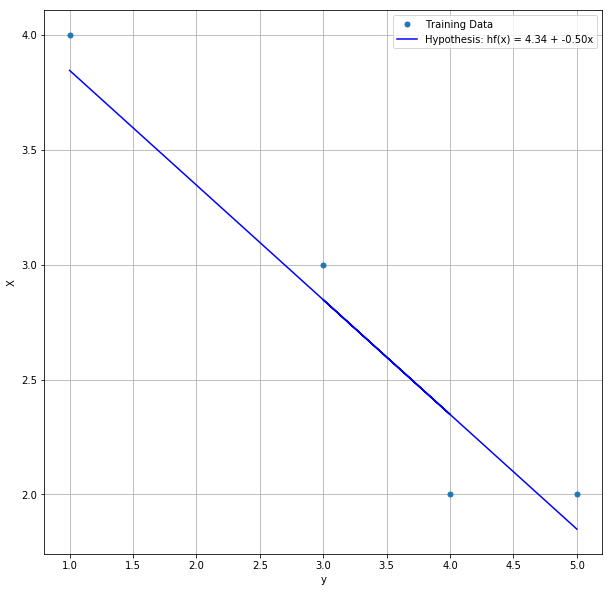

In [28]:
#Plot the line on top of the data to see the linear fuction
def lastHf(x):
    return theta[0] + theta[1]*x
plt.figure(figsize=(10,10))
plt.plot(X[:,1],y[:,0],'o',markersize=5,label='Training Data')
plt.plot(X[:,1],lastHf(X[:,1]),'b-',label = 'Hypothesis: hf(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True)
plt.ylabel('X')
plt.xlabel('y')
plt.legend()